In [11]:
%matplotlib inline
import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10 

In [12]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

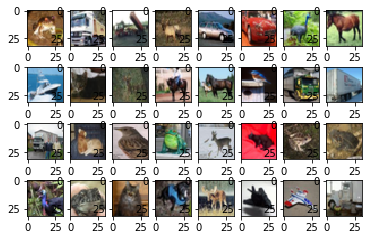

In [13]:
for i in range(0,32):
    plt.subplot(4,8,i+1)
    plt.imshow(X_train[i])
plt.show()

In [14]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
in_rows=32
in_cols=32
in_colors=3
in_shape=(in_rows,in_cols,in_colors)
# in_size=in_rows*in_cols*in_colors
out_size=10

In [17]:
X_train=X_train.astype("float32")/255
#ディープラーニングは正規化する必要あり。RGBの最大値２５５使用。
X_test=X_test.astype("float32")/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [18]:
from keras.utils.np_utils import to_categorical
y_train=to_categorical(y_train.astype("int32"),out_size)
y_test=to_categorical(y_test.astype("int32"),out_size)
# 目的変数は、one-hotペクトル化

In [19]:
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential

In [20]:
# モデルを定義 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size))
model.add(Activation('softmax'))

NameError: name 'num_classes' is not defined

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
hist=model.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(X_test,y_test))

In [ ]:
score=model.evaluate(X_test,y_test,verbose=1)
print("正解率＝",score[1])

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
model.save_weights("cifar10-weight.h5")

In [ ]:
#計算結果は、vscodeでは限界があるため、kaggleのnotebook(mnist-mlpを参照)